In this notebook, we focus on developing convolutional neural networks on our original dataset. 

__Size of the datasets:__

- training set: 214 samples
- validation set: 72 samples
- test set: 71 samples

Among the 4 models we build, model 4 achieved the best performace. It has 4 convolutional layers followed by 3 fully connected layers, altogether 7 layers. 

__Result of model 4 with 30 epochs:__

- train accuracy: 0.9860
- test accuracy: 0.8310

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

from sklearn.model_selection import train_test_split

np.random.seed(1)

Using TensorFlow backend.


# Import training and test data

In [8]:
train_images = []       
train_labels = []
shape = (200,200)  
train_path = os.getcwd() + '/dataset/training_set/'

for folder in os.listdir(train_path):
    for filename in os.listdir(train_path + str(folder)):
        if filename.split('.')[1] == 'jpg':
            img = cv2.imread(os.path.join(train_path + str(folder), filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Spliting file names and storing the labels for image in list
            train_labels.append(str(folder))
            
            # Resize all images to a specific shape
            img = cv2.resize(img,shape)
            
            train_images.append(img)

# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images, train_labels, random_state = 1)

# Normalize the dataset
x_train = x_train/255.
x_val = x_val/255.

[1 0 0]


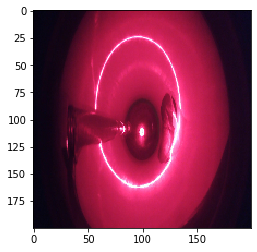

In [9]:
print(train_labels[0])
plt.imshow(train_images[0])

In [10]:
test_images = []
test_labels = []
shape = (200,200)
test_path = os.getcwd() + '/dataset/test_set/'

for folder in os.listdir(test_path):
    for filename in os.listdir(test_path + str(folder)):
        if filename.split('.')[1] == 'jpg':
            img = cv2.imread(os.path.join(test_path + str(folder), filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Spliting file names and storing the labels for image in list
            test_labels.append(str(folder))

            # Resize all images to a specific shape
            img = cv2.resize(img,shape)

            test_images.append(img)
        
# Converting labels into One Hot encoded sparse matrix
test_labels = pd.get_dummies(test_labels).values        

# Converting test_images to array
test_images = np.array(test_images)

# ConvNet model 1

We first build model 1 with quite simple architecture, and then iterate based on the result.

In [14]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'tanh', input_shape = (200,200,3,)))
model.add(Conv2D(30, (3,3), activation = 'tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(30, (3,3), activation = 'tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(30, (3,3), activation = 'tanh'))

model.add(Flatten())

model.add(Dense(20, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
    
model.compile(loss = 'categorical_crossentropy', 
              metrics = ['acc'],
              optimizer = 'adam')

In [15]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 196, 196, 30)      8670      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 98, 98, 30)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 96, 96, 30)        8130      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 48, 48, 30)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 46, 46, 30)        8130      
_________________________________________________________________
flatten_3 (Flatten)          (None, 63480)            

In [16]:
history = model.fit(x_train, y_train,
                    epochs = 30, batch_size = 16,
                    validation_data = (x_val,y_val))

Train on 214 samples, validate on 72 samples
Epoch 1/30
214/214 [==============================] - 31s 144ms/step - loss: 1.3339 - acc: 0.3224 - val_loss: 1.0966 - val_acc: 0.3056
Epoch 2/30
214/214 [==============================] - 30s 138ms/step - loss: 1.0974 - acc: 0.3785 - val_loss: 1.0724 - val_acc: 0.5972
Epoch 3/30
214/214 [==============================] - 30s 142ms/step - loss: 1.1482 - acc: 0.4206 - val_loss: 1.1005 - val_acc: 0.3194
Epoch 4/30
214/214 [==============================] - 30s 138ms/step - loss: 1.0459 - acc: 0.6028 - val_loss: 1.0605 - val_acc: 0.5694
Epoch 5/30
214/214 [==============================] - 30s 138ms/step - loss: 1.0088 - acc: 0.5888 - val_loss: 1.0633 - val_acc: 0.5833
Epoch 6/30
214/214 [==============================] - 29s 137ms/step - loss: 0.9766 - acc: 0.6308 - val_loss: 1.0539 - val_acc: 0.5972
Epoch 7/30
214/214 [==============================] - 30s 141ms/step - loss: 0.9714 - acc: 0.6262 - val_loss: 1.0536 - val_acc: 0.5972
Epoch 8/30

## Summary of result

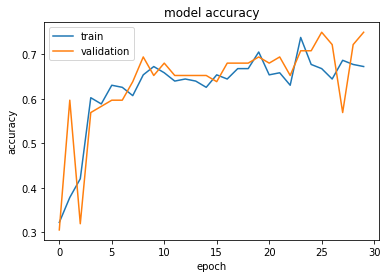

In [17]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

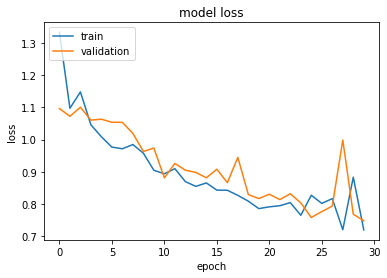

In [18]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

In [19]:
# Evaluating model on test data
evaluate = model.evaluate(test_images,test_labels)
print(evaluate) # loss and accuracy

71/71 [==============================] - 5s 72ms/step
[0.8693338162462476, 0.6056337952613831]


For model 1, we achieved:
- training accuracy: 0.6729
- validation accuracy: 0.7500
- test accuracy: 0.6056

The training accuracy is not good, so we will next try modifying the parameters in the model to achieve higher training result.

# ConvNet model 2

In model 2, we change the activation function to ReLU, instead of tanh.

In [23]:
model2 = Sequential()
model2.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (200,200,3,)))
model2.add(Conv2D(30, (3,3), activation = 'relu'))
model2.add(MaxPool2D(2,2))
model2.add(Conv2D(30, (3,3), activation = 'relu'))
model2.add(MaxPool2D(2,2))
model2.add(Conv2D(30, (3,3), activation = 'relu'))

model2.add(Flatten())

model2.add(Dense(20, activation = 'relu'))
model2.add(Dense(15, activation = 'relu'))
model2.add(Dense(3, activation = 'softmax'))
    
model2.compile(loss = 'categorical_crossentropy', 
              metrics = ['acc'],
              optimizer = 'adam')

In [24]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 196, 196, 30)      8670      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 98, 98, 30)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 96, 96, 30)        8130      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 48, 30)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 46, 46, 30)        8130      
_________________________________________________________________
flatten_5 (Flatten)          (None, 63480)            

In [25]:
history2 = model2.fit(x_train, y_train,
                    epochs = 30, batch_size = 16,
                    validation_data = (x_val,y_val))

Train on 214 samples, validate on 72 samples
Epoch 1/30
214/214 [==============================] - 27s 127ms/step - loss: 1.0483 - acc: 0.5047 - val_loss: 1.1255 - val_acc: 0.4722
Epoch 2/30
214/214 [==============================] - 25s 115ms/step - loss: 0.8023 - acc: 0.6402 - val_loss: 0.7395 - val_acc: 0.7083
Epoch 3/30
214/214 [==============================] - 24s 114ms/step - loss: 0.5995 - acc: 0.7617 - val_loss: 0.6476 - val_acc: 0.7917
Epoch 4/30
214/214 [==============================] - 24s 113ms/step - loss: 0.5175 - acc: 0.8364 - val_loss: 0.5877 - val_acc: 0.8333
Epoch 5/30
214/214 [==============================] - 24s 113ms/step - loss: 0.4173 - acc: 0.8598 - val_loss: 0.7957 - val_acc: 0.7083
Epoch 6/30
214/214 [==============================] - 24s 112ms/step - loss: 0.4454 - acc: 0.8458 - val_loss: 0.6125 - val_acc: 0.8194
Epoch 7/30
214/214 [==============================] - 24s 112ms/step - loss: 0.3731 - acc: 0.8645 - val_loss: 0.5090 - val_acc: 0.8194
Epoch 8/30

## Summary of result

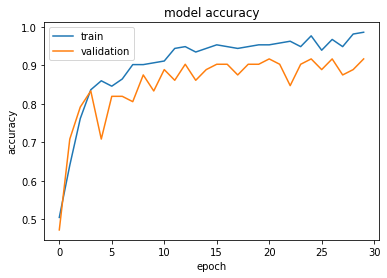

In [26]:
# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

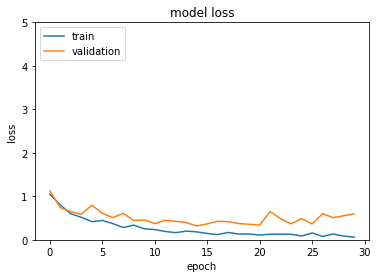

In [27]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,5)
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

In [28]:
# Evaluating model on test data
evaluate2 = model2.evaluate(test_images,test_labels)
print(evaluate2) # loss and accuracy

71/71 [==============================] - 4s 53ms/step
[396.5858446577905, 0.8169013857841492]


For model 2, we achieved:
- train accuracy: 0.9860
- validation accuracy: 0.9167
- test accuracy: 0.8169

It turns out that changing the activation to ReLU would increase accuracy on training, validation and test sets. However, there is still possibility to increase training accuracy. Next, we will try larger network to see if we can further improve training accuracy.

# ConvNet model 3

In model 3, we increase the number of filters in convolutional layers and the size of fully connected layers.

In [29]:
model3 = Sequential()
model3.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (200,200,3,)))
model3.add(Conv2D(32, (3,3), activation = 'relu'))
model3.add(MaxPool2D(2,2))
model3.add(Conv2D(32, (3,3), activation = 'relu'))
model3.add(MaxPool2D(2,2))
model3.add(Conv2D(64, (3,3), activation = 'relu'))

model3.add(Flatten())

model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(15, activation = 'relu'))
model3.add(Dense(3, activation = 'softmax'))
    
model3.compile(loss = 'categorical_crossentropy', 
              metrics = ['acc'],
              optimizer = 'adam')

In [30]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 196, 196, 32)      9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
flatten_6 (Flatten)          (None, 135424)           

In [31]:
history3 = model3.fit(x_train, y_train,
                    epochs = 30, batch_size = 16,
                    validation_data = (x_val,y_val))

Train on 214 samples, validate on 72 samples
Epoch 1/30
214/214 [==============================] - 9s 41ms/step - loss: 1.1123 - acc: 0.4533 - val_loss: 0.9080 - val_acc: 0.5972
Epoch 2/30
214/214 [==============================] - 7s 34ms/step - loss: 0.8478 - acc: 0.5935 - val_loss: 0.8979 - val_acc: 0.6528
Epoch 3/30
214/214 [==============================] - 7s 34ms/step - loss: 0.6599 - acc: 0.7290 - val_loss: 0.7267 - val_acc: 0.7639
Epoch 4/30
214/214 [==============================] - 7s 35ms/step - loss: 0.5357 - acc: 0.8645 - val_loss: 0.7613 - val_acc: 0.8333
Epoch 5/30
214/214 [==============================] - 8s 37ms/step - loss: 0.5514 - acc: 0.8551 - val_loss: 0.5856 - val_acc: 0.8611
Epoch 6/30
214/214 [==============================] - 8s 35ms/step - loss: 0.4223 - acc: 0.8832 - val_loss: 0.5771 - val_acc: 0.8333
Epoch 7/30
214/214 [==============================] - 8s 37ms/step - loss: 0.3879 - acc: 0.8645 - val_loss: 0.5742 - val_acc: 0.8611
Epoch 8/30
214/214 [====

## Summary of result

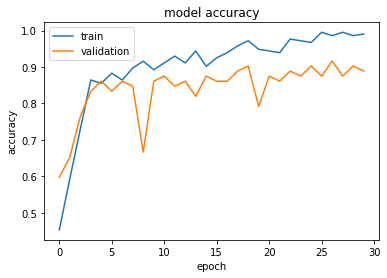

In [32]:
# summarize history for accuracy
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

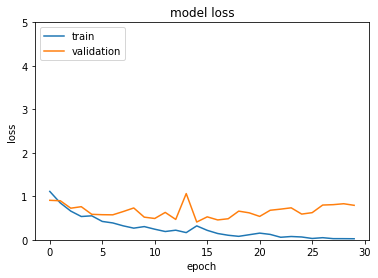

In [33]:
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,5)
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

In [34]:
# Evaluating model on test data
evaluate3 = model3.evaluate(test_images,test_labels)
print(evaluate3) # loss and accuracy

71/71 [==============================] - 1s 11ms/step
[495.3132960359815, 0.8169013857841492]


For model 3, we achieved:
- train accuracy: 0.9907
- validation accuracy: 0.8889 (During training, the highest validation accuracy is 0.9028.)
- test accuracy: 0.8169

We achieve a little improvement on training accuracy. There is still a gap between training and validataion accuracy. So we might overfit the training data, which means we should try regularization.

# ConvNet model 4

In model 4, we add dropout layers after the two pooling layers to introduce regularization.

In [35]:
model4 = Sequential()
model4.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (200,200,3,)))
model4.add(Conv2D(32, (3,3), activation = 'relu'))
model4.add(MaxPool2D(2,2))
model4.add(Dropout(0.25))
model4.add(Conv2D(32, (3,3), activation = 'relu'))
model4.add(MaxPool2D(2,2))
model4.add(Dropout(0.25))
model4.add(Conv2D(64, (3,3), activation = 'relu'))

model4.add(Flatten())

model4.add(Dense(64, activation = 'relu'))
model4.add(Dense(15, activation = 'relu'))
model4.add(Dense(3, activation = 'softmax'))
    
model4.compile(loss = 'categorical_crossentropy', 
              metrics = ['acc'],
              optimizer = 'adam')

In [36]:
model4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 196, 196, 32)      9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 48, 48, 32)       

In [37]:
history4 = model4.fit(x_train, y_train,
                    epochs = 30, batch_size = 16,
                    validation_data = (x_val, y_val))

Train on 214 samples, validate on 72 samples
Epoch 1/30
214/214 [==============================] - 11s 51ms/step - loss: 1.0262 - acc: 0.5234 - val_loss: 0.8451 - val_acc: 0.6250
Epoch 2/30
214/214 [==============================] - 9s 44ms/step - loss: 0.7595 - acc: 0.6776 - val_loss: 0.7300 - val_acc: 0.7639
Epoch 3/30
214/214 [==============================] - 9s 44ms/step - loss: 0.6784 - acc: 0.7804 - val_loss: 0.6234 - val_acc: 0.7778
Epoch 4/30
214/214 [==============================] - 10s 45ms/step - loss: 0.4586 - acc: 0.8411 - val_loss: 0.5389 - val_acc: 0.8333
Epoch 5/30
214/214 [==============================] - 10s 48ms/step - loss: 0.3625 - acc: 0.8551 - val_loss: 0.4684 - val_acc: 0.8611
Epoch 6/30
214/214 [==============================] - 10s 48ms/step - loss: 0.3413 - acc: 0.8738 - val_loss: 0.4949 - val_acc: 0.8750
Epoch 7/30
214/214 [==============================] - 10s 47ms/step - loss: 0.2967 - acc: 0.8972 - val_loss: 0.4430 - val_acc: 0.8611
Epoch 8/30
214/214 

## Summary of result

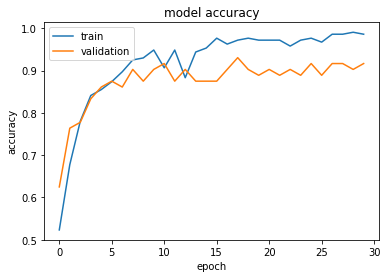

In [38]:
# summarize history for accuracy
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

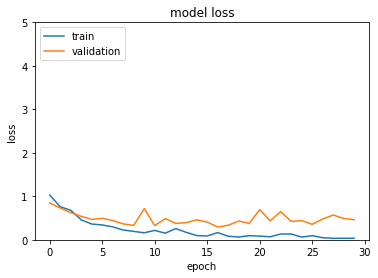

In [39]:
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,5)
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

In [40]:
# Evaluating model on test data
evaluate4 = model4.evaluate(test_images,test_labels)
print(evaluate4) # loss and accuracy

71/71 [==============================] - 1s 13ms/step
[289.65974619690803, 0.8309859037399292]


For model 4, we achieved:
- train accuracy: 0.9860
- validation accuracy: 0.9167 
- test accuracy: 0.8310

We improve validation accuracy slightly by adding dropout regularization. However, the test accuracy remains unchanged. Maybe we need more data for training. So, next we will try data augmentation.